In [1]:
# https://scikit-learn.org/stable/modules/classes.html

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [2]:
travel = pd.read_csv('data/tripadvisor.csv')

In [20]:
travel.columns

Index([u'Galerias de Arte', u'Clubes de Dança', u'Bares', u'Restaurantes',
       u'Museus', u'Resorts', u'Parque', u'Praias', u'Teatros',
       u'Centros Religiosos'],
      dtype='object')

In [3]:
travel.describe()

,Galerias de Arte,Clubes de Dança,Bares,Restaurantes,Museus,Resorts,Parque,Praias,Teatros,Centros Religiosos
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


- Atráves da das informações mostradas a cima, podemos observar que todos os os campos estão preenchidos, não faltando dados.
- Aparentemente são notas que vão de 0 a 4, pois o valor máximo foi 3.76, enquanto o mínimo foi 0.00.
- Feature que teve o maior desvio padrão foi Resorts.
- Feature que obteve a maior média foi Parque, enquanto a que obteve a menor média foi Restaurantes.

In [4]:
travel.head(10)

,Galerias de Arte,Clubes de Dança,Bares,Restaurantes,Museus,Resorts,Parque,Praias,Teatros,Centros Religiosos
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


In [5]:
travel.tail(10)

,Galerias de Arte,Clubes de Dança,Bares,Restaurantes,Museus,Resorts,Parque,Praias,Teatros,Centros Religiosos
970,0.58,1.96,0.24,0.47,1.04,1.74,3.18,2.70,1.57,2.62
971,1.28,1.24,0.14,0.55,0.62,2.26,3.18,2.86,2.46,2.54
972,1.22,1.16,0.38,1.55,0.40,1.24,3.18,2.82,1.92,2.54
973,0.38,1.96,0.19,0.48,1.14,2.14,3.18,2.78,1.54,2.58
974,1.02,2.44,1.89,0.47,1.76,2.50,3.19,2.66,1.73,2.48
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
979,0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


Vendo os 10 primeiros dados e os últimos 10, não conseguimos identificar um padrão, até por que trata-se de avaliações de diferentes pessoas.

In [6]:
travel.dtypes

Galerias de Arte      float64
Clubes de Dança       float64
Bares                 float64
Restaurantes          float64
Museus                float64
Resorts               float64
Parque                float64
Praias                float64
Teatros               float64
Centros Religiosos    float64
dtype: object

In [7]:
travel[travel['Resorts'] > 3.4]

,Galerias de Arte,Clubes de Dança,Bares,Restaurantes,Museus,Resorts,Parque,Praias,Teatros,Centros Religiosos
536,0.74,2.24,2.63,0.72,1.4,3.76,3.2,2.75,1.63,2.48


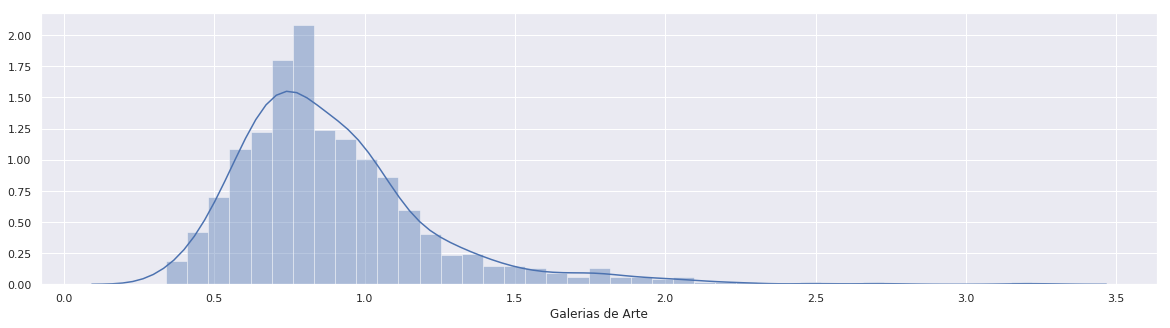

In [10]:
# este comando abaixo é requerido para execução do matplotlib em notebooks jupyter
%matplotlib inline  
plt.figure(figsize=(20, 5))
sns.distplot(travel['Galerias de Arte'])

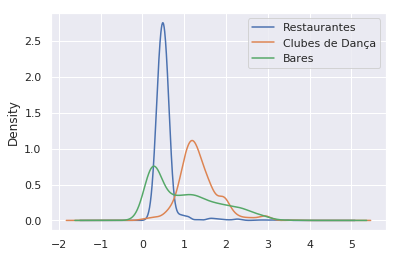

In [16]:
travel[['Restaurantes','Clubes de Dança','Bares']].plot(kind='kde')

In [19]:
sns.pairplot(travel)

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

Error in callback <function post_execute at 0x7f5b7162eb90> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 1800x1800 with 100 Axes>